# Tutorial 8: random selection on the all the features
(without feature selection)

---

### Introduction

Hello, this notebook will show how to use RFE to perform further feature selection, as we found that most features are very highly correlated, therfore we would need to remove those using the tool that we mentioned above. 

first, let us call the data

In [1]:
%store -r df_input_GD
%store -r y_GD
%store -r df_GD

In [2]:
y_GD = y_GD.map({'S': 1, 'B': 0})

---

calling some packages

In [3]:
# Python packages 
import pandas as pd # for importing data into data frame format
import seaborn as sns # For drawing useful graphs, such as bar graphs
import numpy as np
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std

---

<b><i> Data splitting </i></b> 

In [4]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split( df_input_GD, y_GD, test_size = 0.3, random_state=3, stratify=y_GD) # train and valid sets

In [5]:
print(Xtrain.shape)
print(Xtest.shape)

(382, 2074)
(165, 2074)


---

### LR

In [14]:
from sklearn.linear_model import LogisticRegression
import random

In [15]:
lr = LogisticRegression()

In [16]:
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [1000, 100, 10, 1.0, 0.1, 0.01, 0.001]
lr_par = dict(solver=solvers,penalty=penalty,C=c_values)

In [17]:
models = [[lr, 'lr', 14]]
par = [lr_par]

In [18]:
from source.ml_acc import get_accuracy_ml

2


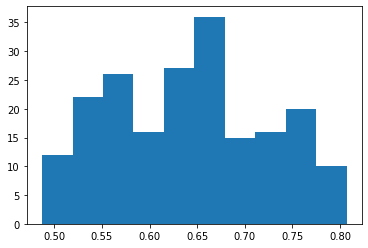

0.6401322119951038
0.08162127310742322
3


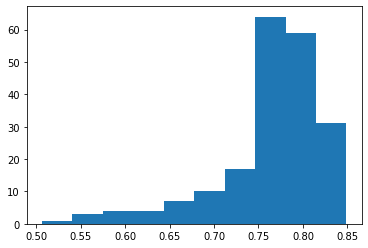

0.7632238855902229
0.06075745478941124
4


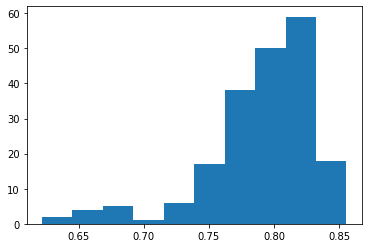

0.7904241800538577
0.04218364244370226
5


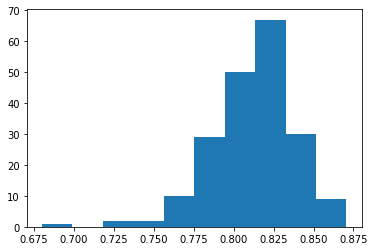

0.812031619625682
0.025726857448669066
6


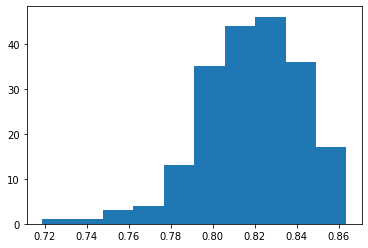

0.8176710161845169
0.0239138278429445
7


In [ ]:
num_ml_tools = len(par)
ml_dicts = {}
tot_acc = []
for m, par in zip(models, par):
    key0 = str(m[1])
    ml_dicts[key0] = {}
    i = 0
    for i in range(2,9,1):
        print(i)
        acc = []
        for t in range (200):
            rand = random.sample(range(0, len(Xtrain.columns)), i)

            xtr =  Xtrain.iloc[:, rand]
            xte =  Xtest.iloc[:, rand]
            results = get_accuracy_ml (m[0], m[2], par, np.array(xtr), np.array(Ytrain), np.array(xte), np.array(Ytest)) # to get the accuracies for the ml model

            key = str(m[1])+","+str((i))
            ml_dicts[key0][key] = {}
            acc.append(results[0])

            ml_dicts[key0][key]['tot_acc'] = results[0]
            ml_dicts[key0][key]['jack_train'] = results[1]
            ml_dicts[key0][key]['jack_test'] = results[2]
            
        plt.hist(acc)
        plt.show()
        print(mean(acc))
        print(std(acc))
        tot_acc.append(acc)

---

In [ ]:
for i in range(2,9,1):
    print(i)
    print(mean(tot_acc[i]))
    print(std(tot_acc[i]))
    plt.hist(tot_acc[i])
    plt.show()
    print()